In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from alibi.explainers.permutation_importance import PermutationImportance, plot_permutation_importance

%load_ext autoreload
%autoreload 2

### Create classification dataset

In [2]:
X, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=2,
                           n_redundant=0,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

### Train model

In [3]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

print("Train score: %.2f" % clf.score(X_train, y_train))
print("Test score: %.2f" % clf.score(X_test, y_test))

Train score: 1.00
Test score: 0.94


### Explain model

In [4]:
def loss_fn(y_true: np.ndarray, y_pred: np.ndarray, sample_weight: np.ndarray) -> np.ndarray:
    return 1 - accuracy_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

In [9]:
explainer = PermutationImportance(predictor=clf.predict, verbose=True)

In [17]:
exp = explainer.explain(X=X_test,
                        y=y_test,
                        loss_fns=loss_fn,
                        method="estimate",
                        kind="ratio")

100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

['f_0', 'f_1', 'f_2', 'f_3', 'f_4']


TypeError: '<' not supported between instances of 'dict' and 'dict'

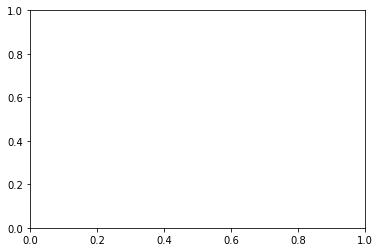

In [15]:
plot_permutation_importance(exp)